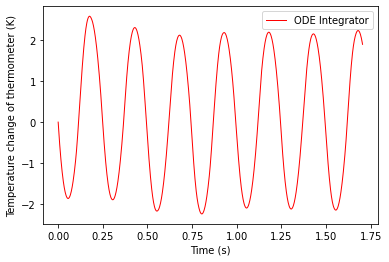

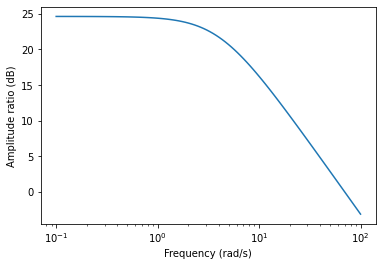

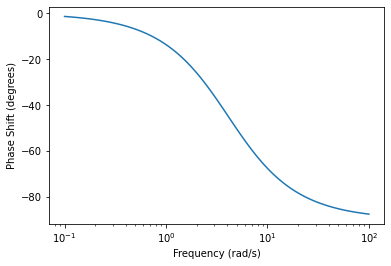

In [7]:
# %% Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import signal
from scipy.misc import derivative

# Simulate taup * d(Delta*T)/dt + Delta*T = (Tinf - T0)

#PHYSICAL CONSTANTS
cv = 140    #Heat capacity of Mercury in J/(kG K)
m = 0.7e-3  #Mass of Hg in the Thermometer (kg)
T0 = 293.15 #Initial temperature of the thermometer (K)
Tinf = 310.15 #Initial temperature of the water (K)
As = 0.001610066    #Surface area for a thermometer that is 10cm deep and .5cm in diameter (m^2)
h = 250.0   #Convective heat transfer coefficient between water and thermometer (W/(m^2 K))
w= 0.25 #width of rectangulare or square waves

#CALCULATED CONSTANTS
Kp = (Tinf - T0)
taup = (m*cv)/(h*As)



def f(t, y, c):
# Function that contains the RHS of the ordinary differential equation
#For sinusoidal response use np.sin(np.pi*t/taup)
#For a random input use np.random.random_sample()
    Fx = TriangularWave(t)
    dydt = (Kp*Fx - y) / taup
    return dydt

def TriangularWave(t):
    return signal.sawtooth(2*np.pi*4*t,0.5)
    
    
    
    
    # if t <0 or t >= w:
    #     Rp = 0
    # else:
    #     Rp = 1
             
    # return Rp*t*np.heaviside(t,1)

def Step(t):
# Unit Step input function
    return np.heaviside(t,1)

def Ramp(t): 
#Ramp function input
    return t*np.heaviside(t,1)

def RectangularPulse(t,w):
#Rectangular pulse, width = w   
    if t <0 or t >= w:
        Rp = 0
    else:
        Rp = 1
             
    return Rp*np.heaviside(t,1)

def Impulse(t,w):
#Unit impulse function input 
#w is the width of the pulse; it should be very small
    if t <0 or t >= w:
        Rp = 0
    else:
        Rp = 1
        
    Height = 1/w
             
    return Height*Rp

def SquareWave(t,w):
    pass




# %% Define time spans, initial values, and constants
tspan = np.linspace(0, 7*taup, 1000)
yinit = [0]     #initial value
c = []          #This constant is not used in this example

# %% Solve differential equation
sol = solve_ivp(lambda t, y: f(t, y, c),
                [tspan[0], tspan[-1]], yinit, method='RK45', t_eval=tspan)
    

# Alternate Technique: Transfer Function method
# Note the transfer function method automatically evaluates the 1st order ODE up to 7*tau
num = [Kp]
den = [taup,1]
sys1 = (num,den)
t1,y1 = signal.step(sys1)       #step can be changed to impulse, or freqresp #step response


# Commands for plotting the solution of the ODE
plt.figure(1)
# plt.plot(t1,y1,'b--',linewidth=3,label='Transfer Fcn')
# plt.plot(sol.t,x,'b--',linewidth=3,label='Input Function')
plt.plot(sol.t,sol.y[0],'r-',linewidth=1,label='ODE Integrator')
plt.xlabel('Time (s)')
plt.ylabel('Temperature change of thermometer (K)')
plt.legend(loc='best')
plt.show()

#Something extra; for making Bode plots
# w, mag, phase = signal.bode(sys1)
# plt.figure()
# plt.semilogx(w, mag)    # Bode magnitude plot
# plt.xlabel('Frequency (rad/s)')
# plt.ylabel('Amplitude ratio (dB)')

# plt.figure()
# plt.semilogx(w, phase)  # Bode phase plot
# plt.xlabel('Frequency (rad/s)')
# plt.ylabel('Phase Shift (degrees)')
# plt.show()





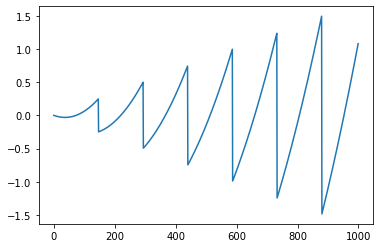

In [82]:
testing=TriangularWave(tspan)
plt.figure(2)
plt.plot(testing, label="Testing")
plt.show()

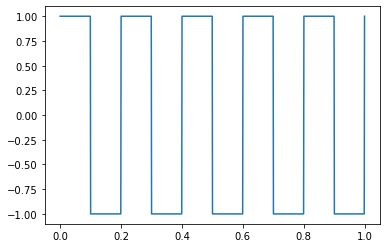

In [49]:
#  Sampling rate 1000 hz / second
gt = np.linspace(0, 1, 1000, endpoint=True)
 

# Plot the square wave signal

plt.plot(gt, signal.square(2 * np.pi * 5 * gt))
plt.show()

In [57]:
def myfunc(A,P,x):
    ylist=[]
    for element in x:
        y = (A/P) * (P - abs(element % (2*P) - P) )
        ylist.append(y)
    return ylist

print(myfunc(2,2,[0,1,2,3,4,5]))

[0.0, 1.0, 2.0, 1.0, 0.0, 1.0]


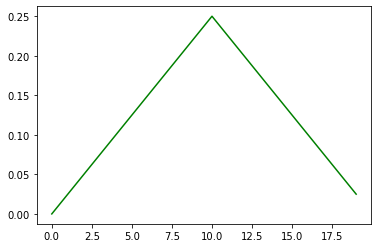

In [3]:
def triangle(section, amplitude):
    for i in range(section):
        yield i * (amplitude / section)
    for i in range(section):
        yield (amplitude - (i * (amplitude / section)))
    # return amplitude * 2 * abs(round(1.75/period)-(1.75/period))


trilist=list(triangle(10,0.25))
# print(trilist)
plt.figure(2)
plt.plot(trilist,color="green")
plt.show()